<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Copia_de_Cook_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns


import numpy as np
from matplotlib import pyplot as plt


In [39]:
#create data frame with no outliers

data1 = {'orden': [1, 2, 2, 3, 4, 5, 7, 3, 2, 12, 11, 15, 14, 17, 22], 'edad': [22, 23, 24, 23, 19, 34, 35, 36, 36, 34, 32, 38, 41,
                                42, 44]}
wo_outliers = pd.DataFrame(data1)
print("without", wo_outliers)

data2 = {'orden': [1, 2, 2, 3, 4, 5, 7, 3, 2, 12, 11, 15, 14, 17, 22], 'edad': [190, 23, 24, 23, 19, 34, 35, 36, 36, 34, 32, 38, 41,42, 180]}
w_outliers = pd.DataFrame(data2)
print("with", w_outliers)

without     orden  edad
0       1    22
1       2    23
2       2    24
3       3    23
4       4    19
5       5    34
6       7    35
7       3    36
8       2    36
9      12    34
10     11    32
11     15    38
12     14    41
13     17    42
14     22    44
with     orden  edad
0       1   190
1       2    23
2       2    24
3       3    23
4       4    19
5       5    34
6       7    35
7       3    36
8       2    36
9      12    34
10     11    32
11     15    38
12     14    41
13     17    42
14     22   180


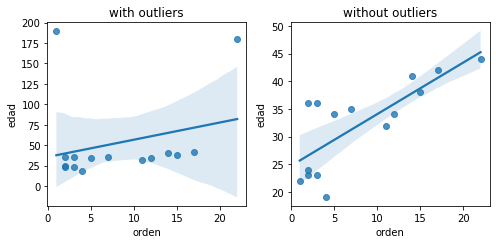

In [40]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)

axes[0].title.set_text('with outliers')
axes[1].title.set_text('without outliers')

sns.regplot(x=wo_outliers["orden"], y=wo_outliers['edad'], ax=axes[1],label="without outliers",)
sns.regplot(x=w_outliers["orden"], y=w_outliers['edad'], ax=axes[0],label="with outliers")
plt.show()


In [21]:


#fit the linear regression model to the dataset with outliers


import statsmodels.api as sm

#define response variable
y = w_outliers['edad']
#define explanatory variable
x = w_outliers['orden']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y,x).fit() 

np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.78167086, 0.00778515, 0.00688738, 0.00812162, 0.01188796,
       0.00239595, 0.00313348, 0.0007978 , 0.00040285, 0.01371104,
       0.01165023, 0.02876499, 0.01597468, 0.04477099, 1.63100305]), array([0.47800785, 0.99224969, 0.9931399 , 0.9919163 , 0.98819315,
       0.99760735, 0.99687218, 0.99920257, 0.99959725, 0.98639677,
       0.98842768, 0.97170645, 0.98417152, 0.95636321, 0.23334581]))


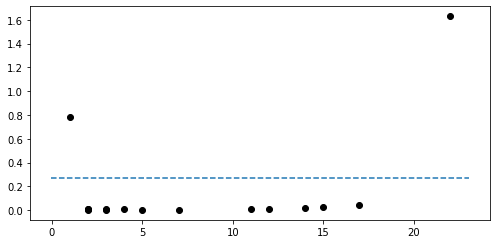

In [26]:
# Plot Cook's Distance with a horizontal line at 4/n to see which observations
#exceed this thresdhold

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


n = len(w_outliers.index)

plt.plot(w_outliers['orden'],cooks[0],'o', color='black')
abline(0,4/n)

    orden  edad
1       2    23
2       2    24
3       3    23
4       4    19
5       5    34
6       7    35
7       3    36
8       2    36
9      12    34
10     11    32
11     15    38
12     14    41
13     17    42
    orden  edad
0       1   190
1       2    23
2       2    24
3       3    23
4       4    19
5       5    34
6       7    35
7       3    36
8       2    36
9      12    34
10     11    32
11     15    38
12     14    41
13     17    42
14     22   180


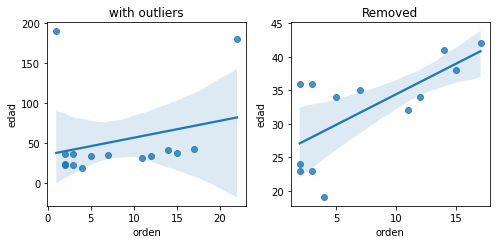

In [46]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)

axes[0].title.set_text('with outliers')
axes[1].title.set_text('Removed')

removed_outliers= w_outliers[cooks[0] < 4/n]

print(removed_outliers)
print(w_outliers)

sns.regplot(x=w_outliers["orden"], y=w_outliers['edad'], ax=axes[0],label="with outliers")
sns.regplot(x=removed_outliers["orden"], y=removed_outliers['edad'], ax=axes[1],label="removed outliers",)

plt.show()
